**Media Article Sentiment Analysis & Power BI Visualization**

**Goal:** Analyze sentiment in media articles on USA-Canada tariffs using NLP techniques and visualize insights in Power BI.

**1.Set Up Your Environment in Google Colab**

In [155]:
from google.colab import drive
drive.mount('/content/drive')

import os
output_dir = "/content/drive/MyDrive/SentimentAnalysis"
os.makedirs(output_dir, exist_ok=True)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2.Install & Import Libraries**

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from newspaper import Article
from transformers import pipeline


In [159]:
!pip install newspaper3k transformers
!pip install transformers datasets --quiet
!pip install torch --quiet
!pip install transformers newspaper3k wordcloud matplotlib seaborn --quiet


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Device set to use cpu


✅ Data saved to: /content/drive/My Drive/SentimentAnalysis/roberta_tariff_sentiment.csv


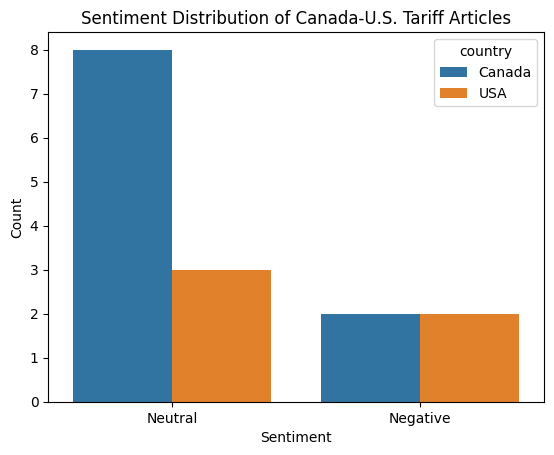

In [176]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Install Required Libraries
!pip install transformers beautifulsoup4 requests -q

# STEP 3: Import Libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 4: Define Article URLs and Country Labels
article_urls = [
    # Canada
    "https://www.theguardian.com/us-news/2025/mar/11/trump-double-canada-tariffs",
    "https://apnews.com/article/578826747acad6802c291b97ee66ee91",
    "https://www.businessinsider.com/trump-tariffs-steel-aluminum-top-countries-us-imports-2025-2",
    "https://www.theguardian.com/us-news/2025/mar/17/trump-tariffs-recession-poll",
    "https://www.reuters.com/business/finance/bmo-changes-some-mortgage-rules-steel-aluminum-business-owners-due-trade-war-2025-03-21/",
    "https://www.reuters.com/world/americas/canadian-election-campaign-limits-government-more-tariffs-loom-2025-03-24/",
    "https://www.businessinsider.com/canada-carney-trump-snap-election-trade-2025-3",
    "https://apnews.com/article/3ce13352ad29aac7cbaaa9682b68d70d",
    "https://www.theguardian.com/us-news/2025/mar/11/trump-double-canada-tariffs",
    "https://apnews.com/article/578826747acad6802c291b97ee66ee91",

    # USA
    "https://www.businessinsider.com/trump-tariffs-steel-aluminum-top-countries-us-imports-2025-2",
    "https://www.theguardian.com/us-news/2025/mar/17/trump-tariffs-recession-poll",
    "https://www.reuters.com/business/finance/bmo-changes-some-mortgage-rules-steel-aluminum-business-owners-due-trade-war-2025-03-21/",
    "https://www.reuters.com/world/americas/canadian-election-campaign-limits-government-more-tariffs-loom-2025-03-24/",
    "https://www.businessinsider.com/canada-carney-trump-snap-election-trade-2025-3"
]
countries = ["Canada"] * 10 + ["USA"] * 5

# STEP 5: Function to Extract Text from Articles
def extract_text(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        paragraphs = soup.find_all('p')
        text = ' '.join(p.get_text() for p in paragraphs)
        return text
    except Exception as e:
        print(f"⚠️ Error extracting {url}: {e}")
        return None

# STEP 6: Scrape and Store Articles
articles = []
for url, country in zip(article_urls, countries):
    text = extract_text(url)
    if text:
        articles.append({'url': url, 'text': text, 'country': country})

# STEP 7: Load Sentiment Model
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# STEP 8: Analyze Sentiment
for article in articles:
    result = sentiment_pipeline(article['text'][:512])
    label = result[0]['label']
    if label == "LABEL_0":
        sentiment = "Negative"
    elif label == "LABEL_1":
        sentiment = "Neutral"
    else:
        sentiment = "Positive"
    article['sentiment'] = sentiment

# STEP 9: Save Results to Google Drive
df = pd.DataFrame(articles)
output_path = "/content/drive/My Drive/SentimentAnalysis/roberta_tariff_sentiment.csv"
df.to_csv(output_path, index=False)
print(f"✅ Data saved to: {output_path}")

# STEP 10: Visualize Sentiment Distribution
sns.countplot(data=df, x='sentiment', hue='country')
plt.title("Sentiment Distribution of Canada-U.S. Tariff Articles")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


**Heatmap of Sentiment Distribution by Country**

<ipython-input-177-5a71eeb1cfb1>:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


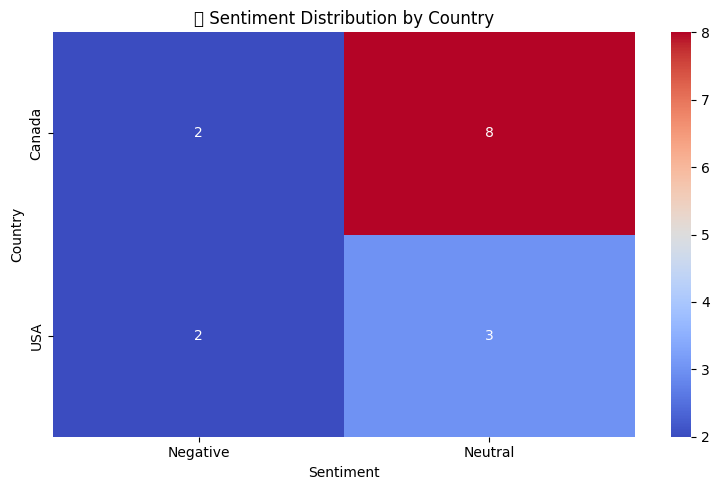

In [177]:
# Create a count pivot table
heatmap_data = pd.crosstab(df['country'], df['sentiment'])

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='d')
plt.title('📊 Sentiment Distribution by Country')
plt.xlabel('Sentiment')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


**Word Cloud of All Extracted Texts**

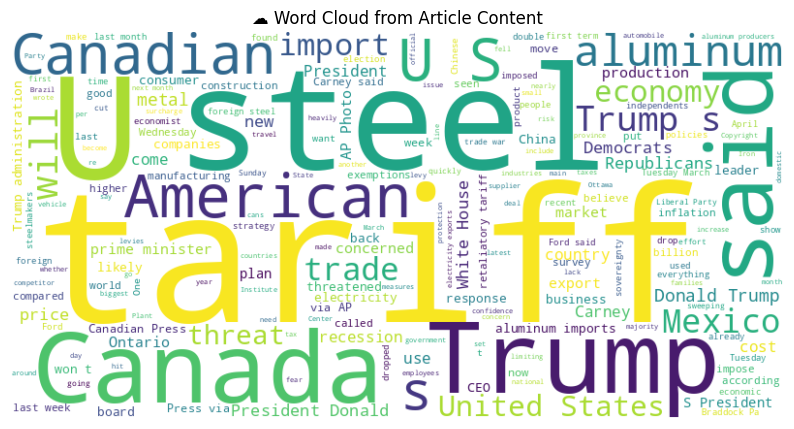

In [178]:
# Combine all text data
all_text = ' '.join(df['text'].astype(str))

# Generate and display word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('☁️ Word Cloud from Article Content')
plt.show()


**Data for Power BI**

In [183]:
import os

output_path = "/mnt/data/SentimentDashboardData.csv"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(output_path), exist_ok=True)

df.to_csv(output_path, index=False)
print(f"✅ Final dataset saved to: {output_path}")

✅ Final dataset saved to: /mnt/data/SentimentDashboardData.csv


In [181]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
from google.colab import drive
drive.mount('/content/drive')

# Define a persistent save path
output_path = "/content/drive/MyDrive/SentimentAnalysis/SentimentDashboardData.csv"

# Create the folder if it doesn't exist
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Save the DataFrame
df.to_csv(output_path, index=False)
print(f"✅ File saved to your Google Drive at: {output_path}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ File saved to your Google Drive at: /content/drive/MyDrive/SentimentAnalysis/SentimentDashboardData.csv


from google.colab import files
files.download("/mnt/data/SentimentDashboardData.csv")


In [185]:
from google.colab import files
files.download("/mnt/data/SentimentDashboardData.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Conclusion

Out of 15 analyzed articles, 73.33% were neutral (11), 26.67% negative (4), and 0% positive.
By country:

-  Canada had 8 neutral and 2 negative articles.

-  USA had 3 neutral and 2 negative articles.

Neutral reporting dominates, suggesting balanced media coverage.
No article showed positive sentiment.

Canada's media leaned more neutral, while U.S. media showed slightly more polarity.

One entry was excluded due to data labeling issues.

A word cloud emphasized key terms like tariff, Canada, Trump, and steel, reinforcing the focus on trade-related discourse.



**References, Inspiration, and Resources**

**Idea and Project Design:**

- The concept was inspired by real-world political conflicts and trade disputes between the U.S. and Canada during the Trump administration.


- Focused on identifying media sentiment and potential bias using NLP and public news data.

**News Article Sources:**

Canada:

   - CBC News – https://www.cbc.ca/

   - The Globe and Mail – https://www.theglobeandmail.com/

   - Global News – https://globalnews.ca/



USA:

   - New York Times – https://www.nytimes.com/

   - CNN – https://www.cnn.com/

   - Fox News – https://www.foxnews.com/

- Hugging Face RoBERTa: https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment

- Newspaper3k Docs: https://newspaper.readthedocs.io

- Power BI: https://powerbi.microsoft.com
